In [1]:
import polars as pl
import matplotlib.pyplot as plt

# PARTE INICIAL

In [2]:
df_original = pl.read_excel('projecoes_2024_tab2_grupo_quinquenal.xlsx')

In [3]:
df_original.head()

GRUPO ETÁRIO,SEXO,CÓD.,SIGLA,LOCAL,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025,2026,2027,2028,2029,2030,2031,…,2034,2035,2036,2037,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047,2048,2049,2050,2051,2052,2053,2054,2055,2056,2057,2058,2059,2060,2061,2062,2063,2064,2065,2066,2067,2068,2069,2070
str,str,i64,str,str,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,…,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64
""" 00-04""","""Ambos""",0,"""BR""","""Brasil""",17281547,17123682,16906493,16640256,16343284,16051105,15806173,15551584,15329999,15140576,14926565,14732570,14645770,14585062,14577213,14679432,14705019,14647172,14636517,14570633,14349330,14102904,13820837,13421242,13017992,12674414,12380087,12136911,11925707,11724741,11547274,11387815,…,10986850,10873117,10766566,10665345,10568366,10474635,10382826,10292025,10202128,10112750,10023192,9933056,9842172,9750554,9657732,9562852,9465427,9365666,9263843,9159606,9052463,8942514,8830712,8718377,8606226,8494854,8385560,8279456,8177111,8079433,7987391,7901241,7820627,7744772,7673320,7606268,7543093
""" 05-09""","""Ambos""",0,"""BR""","""Brasil""",17378990,17390172,17379924,17349975,17303761,17217876,17064624,16851635,16589485,16296374,16004125,15753231,15491395,15260323,15057076,14841043,14662314,14581565,14518069,14506665,14609239,14638890,14588148,14589745,14531027,14303619,14048266,13766965,13377961,12980620,12642552,12353311,…,11708545,11532031,11372430,11226909,11093601,10970904,10856939,10750226,10648948,10552061,10458544,10367093,10276714,10187204,10098226,10009063,9919300,9828783,9737507,9645040,9550503,9453413,9353993,9252488,9148544,9041733,8932109,8820606,8708567,8596707,8485608,8376598,8270750,8168636,8071186,7979360,7893433
""" 10-14""","""Ambos""",0,"""BR""","""Brasil""",17599378,17471598,17382310,17339680,17333773,17348818,17360770,17351252,17322069,17276557,17190853,17038072,16826125,16564772,16271685,15981250,15735526,15476458,15246274,15044385,14830142,14653596,14575329,14515508,14505688,14606009,14632529,14580321,14582319,14523060,14295224,14039540,…,12971860,12633768,12344382,12105432,11897649,11698969,11522206,11362393,11216781,11083480,10960890,10847158,10740735,10639728,10543088,10449800,10358572,10268418,10179144,10090395,10001431,9911890,9821580,9730508,9638227,9543886,9446978,9347726,9246401,9142645,9036015,8926567,8815236,8703349,8591634,8480688,8371817
""" 15-19""","""Ambos""",0,"""BR""","""Brasil""",17831344,17866394,17852790,17786266,17669276,17529669,17403541,17315686,17274236,17269246,17259413,17243723,17229588,17206161,17167306,17083436,16928752,16710472,16442716,16161907,15893053,15663254,15402409,15169410,14971635,14763017,14593065,14521488,14468158,14464297,14570091,14600441,…,14493550,14266334,14011233,13730329,13342170,12945738,12608347,12319635,12081344,11874231,11676304,11500343,11341350,11196483,11063895,10941968,10828856,10723045,10622614,10526515,10433758,10343047,10253385,10164609,10076329,9987833,9898732,9808849,9718189,9626310,9532355,9435826,9336980,9236029,9132638,9026379,8917283
""" 20-24""","""Ambos""",0,"""BR""","""Brasil""",16402228,16826765,17170628,17423254,17594842,17692430,17729519,17718310,17653664,17537757,17342029,17119673,16972759,16901546,16881653,16884209,16881225,16849457,16789776,16747832,16702146,16592992,16396616,16138175,15865912,15601880,15386894,15162593,14970007,14806068,14630502,14488996,…,14400712,14508531,14539427,14489752,14492739,14434432,14208503,13954789,13675492,13289639,12895768,12560773,12274276,12037950,11832589,11636346,11461973,11304429,11160921,11029622,10908928,10796985,10692279,10592900,10497828,10406038,10316293,10227566,10139675,10052257,9964592,9876311,9787218,9697332,9606213,9512994,9417186


In [4]:
df_original = df_original.filter(
    pl.col('SEXO') == 'Ambos',
    pl.col('LOCAL') == 'Brasil'
)

In [5]:
df_original = df_original.drop(['SEXO',	'CÓD.',	'SIGLA', 'LOCAL'])

In [6]:
df_original = df_original.rename({
    'GRUPO ETÁRIO': 'grupo_etario'
})

In [7]:
df_original.head()

grupo_etario,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025,2026,2027,2028,2029,2030,2031,2032,2033,2034,2035,2036,2037,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047,2048,2049,2050,2051,2052,2053,2054,2055,2056,2057,2058,2059,2060,2061,2062,2063,2064,2065,2066,2067,2068,2069,2070
str,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64
""" 00-04""",17281547,17123682,16906493,16640256,16343284,16051105,15806173,15551584,15329999,15140576,14926565,14732570,14645770,14585062,14577213,14679432,14705019,14647172,14636517,14570633,14349330,14102904,13820837,13421242,13017992,12674414,12380087,12136911,11925707,11724741,11547274,11387815,11242466,11109355,10986850,10873117,10766566,10665345,10568366,10474635,10382826,10292025,10202128,10112750,10023192,9933056,9842172,9750554,9657732,9562852,9465427,9365666,9263843,9159606,9052463,8942514,8830712,8718377,8606226,8494854,8385560,8279456,8177111,8079433,7987391,7901241,7820627,7744772,7673320,7606268,7543093
""" 05-09""",17378990,17390172,17379924,17349975,17303761,17217876,17064624,16851635,16589485,16296374,16004125,15753231,15491395,15260323,15057076,14841043,14662314,14581565,14518069,14506665,14609239,14638890,14588148,14589745,14531027,14303619,14048266,13766965,13377961,12980620,12642552,12353311,12114564,11907006,11708545,11532031,11372430,11226909,11093601,10970904,10856939,10750226,10648948,10552061,10458544,10367093,10276714,10187204,10098226,10009063,9919300,9828783,9737507,9645040,9550503,9453413,9353993,9252488,9148544,9041733,8932109,8820606,8708567,8596707,8485608,8376598,8270750,8168636,8071186,7979360,7893433
""" 10-14""",17599378,17471598,17382310,17339680,17333773,17348818,17360770,17351252,17322069,17276557,17190853,17038072,16826125,16564772,16271685,15981250,15735526,15476458,15246274,15044385,14830142,14653596,14575329,14515508,14505688,14606009,14632529,14580321,14582319,14523060,14295224,14039540,13758104,13369136,12971860,12633768,12344382,12105432,11897649,11698969,11522206,11362393,11216781,11083480,10960890,10847158,10740735,10639728,10543088,10449800,10358572,10268418,10179144,10090395,10001431,9911890,9821580,9730508,9638227,9543886,9446978,9347726,9246401,9142645,9036015,8926567,8815236,8703349,8591634,8480688,8371817
""" 15-19""",17831344,17866394,17852790,17786266,17669276,17529669,17403541,17315686,17274236,17269246,17259413,17243723,17229588,17206161,17167306,17083436,16928752,16710472,16442716,16161907,15893053,15663254,15402409,15169410,14971635,14763017,14593065,14521488,14468158,14464297,14570091,14600441,14550009,14552534,14493550,14266334,14011233,13730329,13342170,12945738,12608347,12319635,12081344,11874231,11676304,11500343,11341350,11196483,11063895,10941968,10828856,10723045,10622614,10526515,10433758,10343047,10253385,10164609,10076329,9987833,9898732,9808849,9718189,9626310,9532355,9435826,9336980,9236029,9132638,9026379,8917283
""" 20-24""",16402228,16826765,17170628,17423254,17594842,17692430,17729519,17718310,17653664,17537757,17342029,17119673,16972759,16901546,16881653,16884209,16881225,16849457,16789776,16747832,16702146,16592992,16396616,16138175,15865912,15601880,15386894,15162593,14970007,14806068,14630502,14488996,14437542,14397410,14400712,14508531,14539427,14489752,14492739,14434432,14208503,13954789,13675492,13289639,12895768,12560773,12274276,12037950,11832589,11636346,11461973,11304429,11160921,11029622,10908928,10796985,10692279,10592900,10497828,10406038,10316293,10227566,10139675,10052257,9964592,9876311,9787218,9697332,9606213,9512994,9417186


# DATAFRAME BASE

In [8]:
df_base = df_original.unpivot(
    index='grupo_etario',
    on=[str(x)  for x in range(2000, 2071)],
    variable_name='ano',
    value_name='populacao'
).with_columns(
    pl.col('ano').cast(int)
)

In [9]:
df_base.head()

grupo_etario,ano,populacao
str,i64,i64
""" 00-04""",2000,17281547
""" 05-09""",2000,17378990
""" 10-14""",2000,17599378
""" 15-19""",2000,17831344
""" 20-24""",2000,16402228


In [10]:
print(sorted(df_base.select(pl.col('grupo_etario')).unique().to_series().to_list()))

[' 00-04', ' 05-09', ' 10-14', ' 15-19', ' 20-24', ' 25-29', ' 30-34', ' 35-39', ' 40-44', ' 45-49', ' 50-54', ' 55-59', ' 60-64', ' 65-69', ' 70-74', ' 75-79', ' 80-84', ' 85-89', '90+']


In [11]:
df_base_jovem = df_base.filter(
    pl.col('grupo_etario').is_in([ ' 15-19', ' 20-24', ' 25-29'])
).rename({
    'populacao': 'populacao_jovem'
}).sort(['grupo_etario', 'ano'], descending=False)

In [12]:
df_base_jovem.head()

grupo_etario,ano,populacao_jovem
str,i64,i64
""" 15-19""",2000,17831344
""" 15-19""",2001,17866394
""" 15-19""",2002,17852790
""" 15-19""",2003,17786266
""" 15-19""",2004,17669276


In [13]:
df_base_idoso = df_base.filter(
    pl.col('grupo_etario').is_in([' 60-64', ' 65-69', ' 70-74', ' 75-79', ' 80-84', ' 85-89', '90+'])
).rename({
    'populacao': 'populacao_idoso'
})

In [14]:
df_base_idoso.head()

grupo_etario,ano,populacao_idoso
str,i64,i64
""" 60-64""",2000,4702598
""" 65-69""",2000,3678357
""" 70-74""",2000,2861050
""" 75-79""",2000,1955661
""" 80-84""",2000,1148811


# PARTE 1

In [15]:
df_01_jovem = df_base_jovem.group_by('ano').agg(
    pl.col('populacao_jovem').sum()
).sort('ano', descending=False)

df_01_jovem.head()

ano,populacao_jovem
i64,i64
2000,48585436
2001,49308397
2002,49963259
2003,50543078
2004,51046839


In [16]:
df_01_idoso = df_base_idoso.group_by('ano').agg(
    pl.col('populacao_idoso').sum()
).sort('ano', descending=False)

df_01_idoso.head()

ano,populacao_idoso
i64,i64
2000,15229921
2001,15648261
2002,16075850
2003,16518858
2004,16991330


In [17]:
df_01_merge = df_01_jovem.join(df_01_idoso, on='ano')

In [18]:
df_01_merge.head()

ano,populacao_jovem,populacao_idoso
i64,i64,i64
2000,48585436,15229921
2001,49308397,15648261
2002,49963259,16075850
2003,50543078,16518858
2004,51046839,16991330


In [19]:
df_01_unpivoted = df_01_merge.unpivot(
    index='ano',
    on=['populacao_jovem', 'populacao_idoso'],
    variable_name='grupo_populacional',
    value_name='populacao_projetada'
)

In [20]:
df_01_unpivoted.head()

ano,grupo_populacional,populacao_projetada
i64,str,i64
2000,"""populacao_jovem""",48585436
2001,"""populacao_jovem""",49308397
2002,"""populacao_jovem""",49963259
2003,"""populacao_jovem""",50543078
2004,"""populacao_jovem""",51046839


In [21]:
df_01_unpivoted = df_01_unpivoted.with_columns(
    pl.col('grupo_populacional').replace({
        'populacao_jovem': 'Jovem',
        'populacao_idoso': 'Idoso'
    })
)

In [22]:
anos = sorted(df_01_unpivoted.select('ano').to_series().to_list())
print(anos)

[2000, 2000, 2001, 2001, 2002, 2002, 2003, 2003, 2004, 2004, 2005, 2005, 2006, 2006, 2007, 2007, 2008, 2008, 2009, 2009, 2010, 2010, 2011, 2011, 2012, 2012, 2013, 2013, 2014, 2014, 2015, 2015, 2016, 2016, 2017, 2017, 2018, 2018, 2019, 2019, 2020, 2020, 2021, 2021, 2022, 2022, 2023, 2023, 2024, 2024, 2025, 2025, 2026, 2026, 2027, 2027, 2028, 2028, 2029, 2029, 2030, 2030, 2031, 2031, 2032, 2032, 2033, 2033, 2034, 2034, 2035, 2035, 2036, 2036, 2037, 2037, 2038, 2038, 2039, 2039, 2040, 2040, 2041, 2041, 2042, 2042, 2043, 2043, 2044, 2044, 2045, 2045, 2046, 2046, 2047, 2047, 2048, 2048, 2049, 2049, 2050, 2050, 2051, 2051, 2052, 2052, 2053, 2053, 2054, 2054, 2055, 2055, 2056, 2056, 2057, 2057, 2058, 2058, 2059, 2059, 2060, 2060, 2061, 2061, 2062, 2062, 2063, 2063, 2064, 2064, 2065, 2065, 2066, 2066, 2067, 2067, 2068, 2068, 2069, 2069, 2070, 2070]


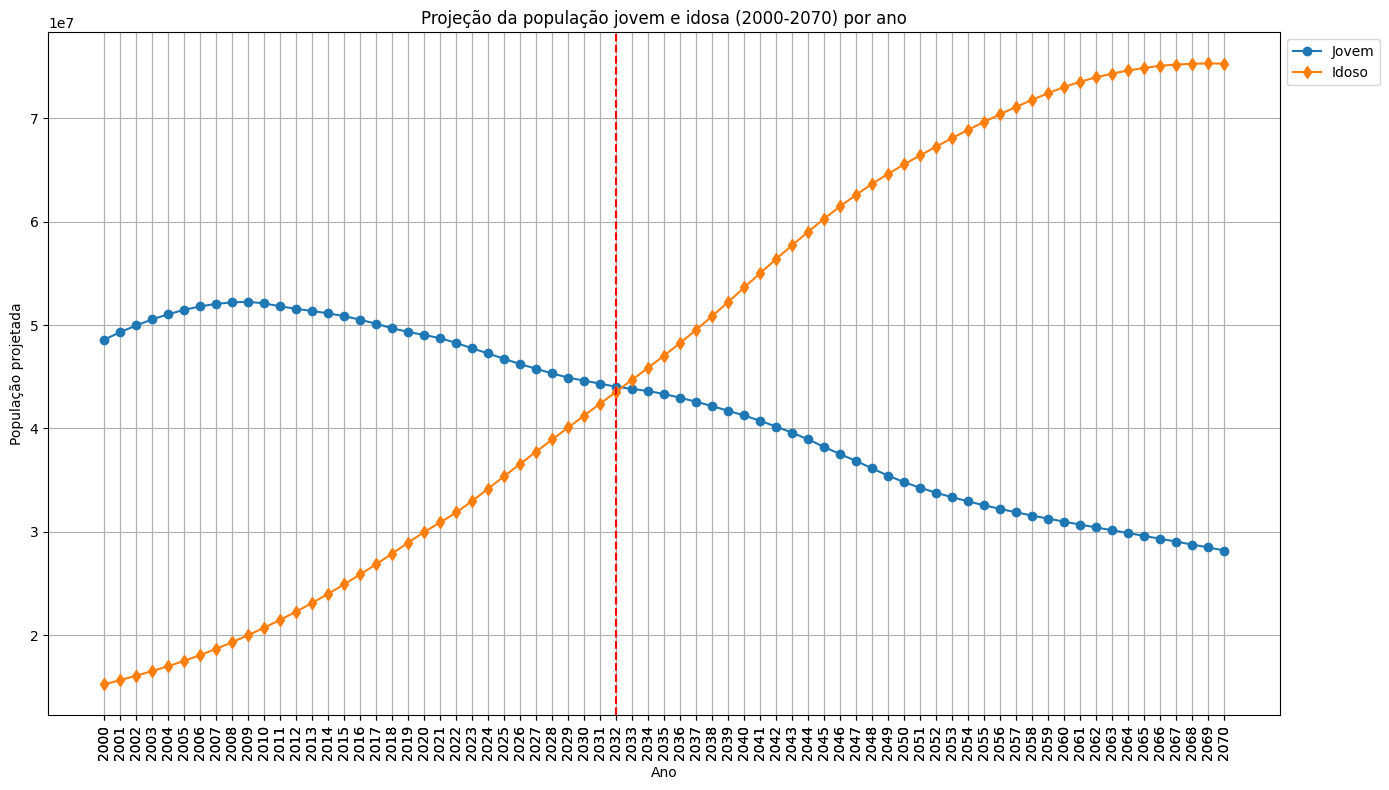

In [23]:
plt.figure(figsize=(14, 8))

marcadores = ['o', 'd']

for (tipo_pop, grupo), marcador in zip(df_01_unpivoted.group_by('grupo_populacional'), marcadores):
    plt.plot(
        grupo.select('ano'),
        grupo.select('populacao_projetada'),
        label=tipo_pop,
        marker=marcador
    )

plt.grid()
plt.tick_params('x', rotation=90)
plt.xticks(anos)
plt.axvline(2032, color='red', linestyle='--')
plt.ylabel('População projetada')
plt.xlabel('Ano')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.title('Projeção da população jovem e idosa (2000-2070) por ano')

plt.tight_layout()
plt.savefig('projecao_populacao_jovem_idosa_por_ano.png', dpi=300, bbox_inches='tight')
plt.show()

In [24]:
df_01_unpivoted.filter(
    pl.col('grupo_populacional') == 'Jovem'
).filter(
    pl.col('populacao_projetada') == pl.col('populacao_projetada').min()
)

ano,grupo_populacional,populacao_projetada
i64,str,i64
2070,"""Jovem""",28185502


In [25]:
df_01_unpivoted.filter(
    pl.col('grupo_populacional') == 'Idoso'
).filter(
    pl.col('populacao_projetada') == pl.col('populacao_projetada').min()
)

ano,grupo_populacional,populacao_projetada
i64,str,i64
2000,"""Idoso""",15229921


In [26]:
df_01_unpivoted.filter(
    pl.col('grupo_populacional') == 'Jovem'
).filter(
    pl.col('populacao_projetada') == pl.col('populacao_projetada').max()
)

ano,grupo_populacional,populacao_projetada
i64,str,i64
2009,"""Jovem""",52248077


In [27]:
df_01_unpivoted.filter(
    pl.col('grupo_populacional') == 'Idoso'
).filter(
    pl.col('populacao_projetada') == pl.col('populacao_projetada').max()
)

ano,grupo_populacional,populacao_projetada
i64,str,i64
2069,"""Idoso""",75315921


In [28]:
df_01_unpivoted.filter(pl.col('ano') == 2032)

ano,grupo_populacional,populacao_projetada
i64,str,i64
2032,"""Jovem""",44030223
2032,"""Idoso""",43555940


In [29]:
pop_jovem_2032 = df_01_unpivoted.filter(
    pl.col('ano') == 2032
).filter(
    pl.col('grupo_populacional') == 'Jovem'
).row(0)[2]

pop_idoso_2032 = df_01_unpivoted.filter(
    pl.col('ano') == 2032
).filter(
    pl.col('grupo_populacional') == 'Idoso'
).row(0)[2]

pop_jovem_2032 - pop_idoso_2032

474283

In [30]:
pop_idoso_2000 = df_01_unpivoted.filter(
    pl.col('ano') == 2000
).filter(
    pl.col('grupo_populacional') == 'Idoso'
).row(0)[2]

pop_idoso_2070 = df_01_unpivoted.filter(
    pl.col('ano') == 2070
).filter(
    pl.col('grupo_populacional') == 'Idoso'
).row(0)[2]

pop_idoso_2070 - pop_idoso_2000

60062229

# PARTE 2

In [31]:
df_02_jovem = df_base_jovem.clone().rename({
    'populacao_jovem': 'populacao'
}).select('ano', 'populacao', 'grupo_etario')

In [32]:
df_02_jovem.head()

ano,populacao,grupo_etario
i64,i64,str
2000,17831344,""" 15-19"""
2001,17866394,""" 15-19"""
2002,17852790,""" 15-19"""
2003,17786266,""" 15-19"""
2004,17669276,""" 15-19"""


In [33]:
df_02_jovem.select('grupo_etario').unique().to_series().to_list()

[' 15-19', ' 20-24', ' 25-29']

In [34]:
sorted(df_base_idoso.select('grupo_etario').unique().to_series().to_list())

[' 60-64', ' 65-69', ' 70-74', ' 75-79', ' 80-84', ' 85-89', '90+']

In [35]:
df_02_idoso = df_base_idoso.clone().rename({
    'populacao_idoso': 'populacao'
})

In [36]:
df_02_idoso.head()

grupo_etario,ano,populacao
str,i64,i64
""" 60-64""",2000,4702598
""" 65-69""",2000,3678357
""" 70-74""",2000,2861050
""" 75-79""",2000,1955661
""" 80-84""",2000,1148811


In [37]:
df_02_idoso_6069 = (df_02_idoso.filter(pl.col('grupo_etario').is_in([' 60-64', ' 65-69']))
                    .group_by('ano')
                    .agg(pl.col('populacao').sum())
                    .with_columns(pl.lit('60-69').alias('grupo_etario'))
                    .sort('ano', descending=False)
                )

In [38]:
df_02_idoso_6069.head()

ano,populacao,grupo_etario
i64,i64,str
2000,8380955,"""60-69"""
2001,8587673,"""60-69"""
2002,8801045,"""60-69"""
2003,9025698,"""60-69"""
2004,9269854,"""60-69"""


In [39]:
sorted(df_base_idoso.select('grupo_etario').unique().to_series().to_list())

[' 60-64', ' 65-69', ' 70-74', ' 75-79', ' 80-84', ' 85-89', '90+']

In [40]:
df_02_idoso_7079 = (df_02_idoso.filter(pl.col('grupo_etario').is_in([' 70-74', ' 75-79']))
                    .group_by('ano')
                    .agg(pl.col('populacao').sum())
                    .with_columns(pl.lit('70-79').alias('grupo_etario'))
                    .sort('ano', descending=False)
                )

In [41]:
df_02_idoso_7079.head()

ano,populacao,grupo_etario
i64,i64,str
2000,4816711,"""70-79"""
2001,4962948,"""70-79"""
2002,5101711,"""70-79"""
2003,5236345,"""70-79"""
2004,5372935,"""70-79"""


In [42]:
sorted(df_base_idoso.select('grupo_etario').unique().to_series().to_list())

[' 60-64', ' 65-69', ' 70-74', ' 75-79', ' 80-84', ' 85-89', '90+']

In [43]:
df_02_idoso_8090 = (df_02_idoso.filter(pl.col('grupo_etario').is_in([' 80-84', ' 85-89', '90+']))
                    .group_by('ano')
                    .agg(pl.col('populacao').sum())
                    .with_columns(pl.lit('80-90+').alias('grupo_etario'))
                    .sort('ano', descending=False)
                )

In [44]:
df_02_idoso_8090.head()

ano,populacao,grupo_etario
i64,i64,str
2000,2032255,"""80-90+"""
2001,2097640,"""80-90+"""
2002,2173094,"""80-90+"""
2003,2256815,"""80-90+"""
2004,2348541,"""80-90+"""


In [45]:
df_02_concated = pl.concat([
    df_02_jovem,
    df_02_idoso_6069, 
    df_02_idoso_7079, 
    df_02_idoso_8090
], how='vertical')

In [46]:
df_02_concated.head()

ano,populacao,grupo_etario
i64,i64,str
2000,17831344,""" 15-19"""
2001,17866394,""" 15-19"""
2002,17852790,""" 15-19"""
2003,17786266,""" 15-19"""
2004,17669276,""" 15-19"""


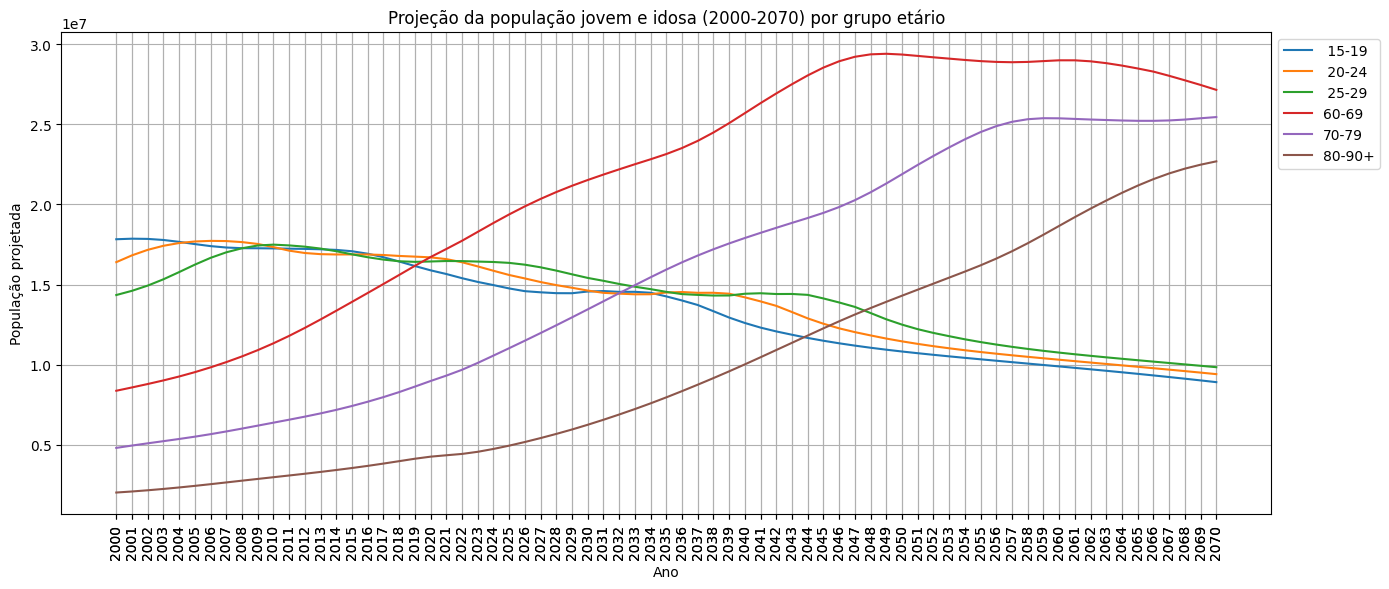

In [50]:
plt.figure(figsize=(14, 6))

for ge, grupo in df_02_concated.group_by('grupo_etario'):
    plt.plot(
        grupo.select('ano'),
        grupo.select('populacao'),
        label=ge
    )

plt.grid()
plt.tick_params('x', rotation=90)
plt.xticks(anos)
plt.ylabel('População projetada')
plt.xlabel('Ano')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.title('Projeção da população jovem e idosa (2000-2070) por grupo etário')

plt.tight_layout()
plt.savefig('projecao_populacao_jovem_idosa_por_grupo_etario.png', dpi=300, bbox_inches='tight')
plt.show()